In [ ]:
from Game import *

Version:  0.3.02


TTT is just Tapatan with 9 pieces total.

Four functions to do:

1. `initial_state()`   return the state for the start of the game
2. `valid_moves(state,player)` return a list of valid moves
3. `update_state(state, player, move )` return the new state
4. `win_status(new_state,player)` returns one of `"win"`,`"lose"`,`"stalemate"` or `None`

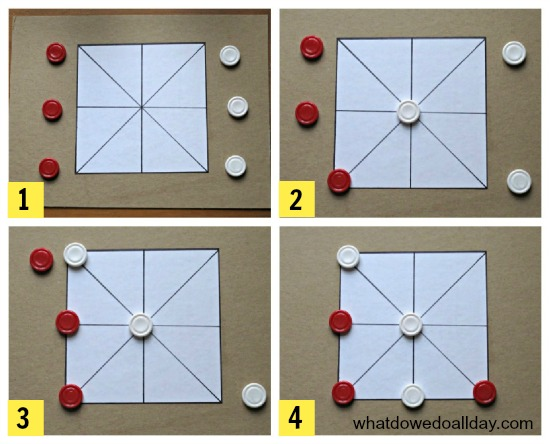

- Rules: https://www.whatdowedoallday.com/tapatan/
- What is state for this game:  3dx3 Board (9 numbers) 0 = empty, 1 = player 1 and 2 = player 2
- What is a move for this game: single # (0-8 for the square locations) after 6 pieces, move = [start,end]

In [ ]:
def initial_state():
    return Board(3,3)

In [ ]:
def count_pieces(state):
    count=0
    for location in range(9):
        if state[location]!=0:
            count=count+1
            
    return count

In [ ]:
def row(state,location):
    r,c=state.rc_from_index(location)
    return r
def col(state,location):
    r,c=state.rc_from_index(location)
    return c

In [ ]:
def valid_moves(state,player):
    
    moves=[]
    
    if count_pieces(state)<6:  # placement - temporaily set to 9 to behave like ttt
        # placement
        for location in range(9): 
            if state[location]==0:
                moves.append(location)
    else:
        # sliding
        for start in range(9):
            if state[start]!=player:
                continue

            rs,cs=row(state,start),col(state,start)

            for location in range(9):
                end=None

                r,c=row(state,location),col(state,location)

                if state[location]==0:

                    if r-rs==1 and c-cs==0:  # vertical
                        end=location
                    if r-rs==-1 and c-cs==0:  # vertical
                        end=location
                    if r-rs==0 and c-cs==1:  # horizontal
                        end=location
                    if r-rs==0 and c-cs==-1:  # horizontal
                        end=location
                    if r-rs==1 and c-cs==1:  # diagonal
                        end=location
                    if r-rs==-1 and c-cs==-1:  # diagonal
                        end=location
                    if r-rs==1 and c-cs==-1:  # diagonal
                        end=location
                    if r-rs==-1 and c-cs==1:  # diagonal
                        end=location

                    if not end is None:
                        moves.append([start,end])
                pass

        
    return moves
    

In [ ]:
def update_state(state,player,move):
    if isinstance(move,int):  # placement
        new_state=state
        new_state[move]=player
        
    else:  # sliding
        start,end=move
        new_state=state
        new_state[start]=0
        new_state[end]=player
        
    return new_state

In [ ]:
def win_status(state,player):
    # 0  1  2 
    # 3  4  5 
    # 6  7  8 

    if player==1:
        other_player=2
    else:
        other_player=1
    
    if state[0]==state[1]==state[2]==player:
        return "win"
    if state[3]==state[4]==state[5]==player:
        return "win"
    if state[6]==state[7]==state[8]==player:
        return "win"
    if state[0]==state[3]==state[6]==player:
        return "win"
    if state[1]==state[4]==state[7]==player:
        return "win"
    if state[2]==state[5]==state[8]==player:
        return "win"
    if state[0]==state[4]==state[8]==player:
        return "win"
    if state[6]==state[4]==state[2]==player:
        return "win"
    
    if not valid_moves(state,other_player):
        return "stalemate"
    
    return None

In [ ]:
def human_move(state,player):
    print("Locations:")
    state.show_locations()
    print("Valid Moves:")
    print(valid_moves(state,player))
    
    while True:
        move=eval(input("Enter your move"))

        if move not in valid_moves(state,player):
            print("That is not a valid move")
        else:
            break
    
    return move

human_agent=Agent(human_move)

In [ ]:
def show_state(state,player):
    print(state)

In [ ]:
def monkey_move(state,player):
    return random.choice(valid_moves(state,player))
monkey_agent=Agent(monkey_move)

In [ ]:
from Game.minimax import *
def minimax_move(state,player):
    values,actions=minimax_values(state,player,display=False,maxdepth=12)
    return top_choice(actions,values)
minimax_agent=Agent(minimax_move)

In [ ]:
def heuristic(state,player):
    return -1

In [ ]:
g=Game()
g.run(monkey_agent,monkey_agent)

====
Game  1
 0  0  0 
 0  0  0 
 0  0  0 

Player 1 moves 6
 0  0  0 
 0  0  0 
 1  0  0 

Player 2 moves 7
 0  0  0 
 0  0  0 
 1  2  0 

Player 1 moves 1
 0  1  0 
 0  0  0 
 1  2  0 

Player 2 moves 5
 0  1  0 
 0  0  2 
 1  2  0 

Player 1 moves 8
 0  1  0 
 0  0  2 
 1  2  1 

Player 2 moves 0
 2  1  0 
 0  0  2 
 1  2  1 

Player 1 moves [8, 4]
 2  1  0 
 0  1  2 
 1  2  0 

Player 2 moves [5, 2]
 2  1  2 
 0  1  0 
 1  2  0 

Player 1 moves [4, 5]
 2  1  2 
 0  0  1 
 1  2  0 

Player 2 moves [2, 4]
 2  1  0 
 0  2  1 
 1  2  0 

Player 1 moves [1, 3]
 2  0  0 
 1  2  1 
 1  2  0 

Player 2 moves [4, 8]
 2  0  0 
 1  0  1 
 1  2  2 

Player 1 moves [6, 4]
 2  0  0 
 1  1  1 
 0  2  2 

Player  1 won.


[1]

In [ ]:
g=Game()
g.run(minimax_agent,monkey_agent)

====
Game  1
 0  0  0 
 0  0  0 
 0  0  0 

Player 1 moves 2
 0  0  1 
 0  0  0 
 0  0  0 

Player 2 moves 7
 0  0  1 
 0  0  0 
 0  2  0 

Player 1 moves 4
 0  0  1 
 0  1  0 
 0  2  0 

Player 2 moves 3
 0  0  1 
 2  1  0 
 0  2  0 

Player 1 moves 6
 0  0  1 
 2  1  0 
 1  2  0 

Player  1 won.


[1]

In [ ]:
g=Game(number_of_games=500)
g.display=False
g.run(minimax_agent,monkey_agent)
g.report()

Total number of games:  500
Winning 93.40 percent
Losing 6.60 percent
Tie 0.00 percent


In [ ]:
state=initial_state()

In [ ]:
state.show_locations()

 0  1  2 
 3  4  5 
 6  7  8 



In [ ]:
state.row(5)

1

In [ ]:
state.col(5)

2